In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()
import plotly.express as px

In [2]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv', index_col=0)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.describe()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
px.histogram(df, x='gender', color= 'stroke')

In [5]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [6]:
px.histogram(df, x='smoking_status', color= 'stroke')

In [7]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
df.shape

(5110, 11)

In [9]:
df.groupby(['gender'])['bmi'].mean()

gender
Female    29.065758
Male      28.647936
Other     22.400000
Name: bmi, dtype: float64

In [10]:
def bmi(cols):
    bmi=cols[0]
    gender=cols[1]
    if pd.isnull(bmi):
        if gender=='Female':
            return 29.065
        elif gender=='Male':
            return 28.64
        else:
            return 22.4
    return bmi
df['bmi']=df[['bmi','gender']].apply(bmi,1)
    
    

In [11]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
df['age'].iplot(kind='hist', xTitle='Age',yTitle='Frequency')

In [13]:
df['bmi'].iplot(kind='hist', xTitle='bmi',yTitle='Frequency')

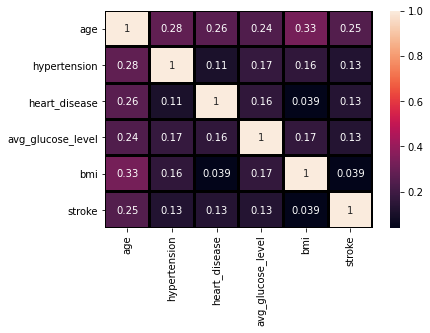

In [14]:
sns.heatmap(df.corr(), annot=True, linewidths=2, linecolor='black' )

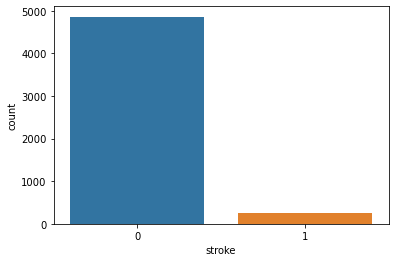

In [15]:
sns.countplot(df['stroke'])

In [16]:
px.histogram(df, x='age', color= 'stroke',facet_col_spacing=10)

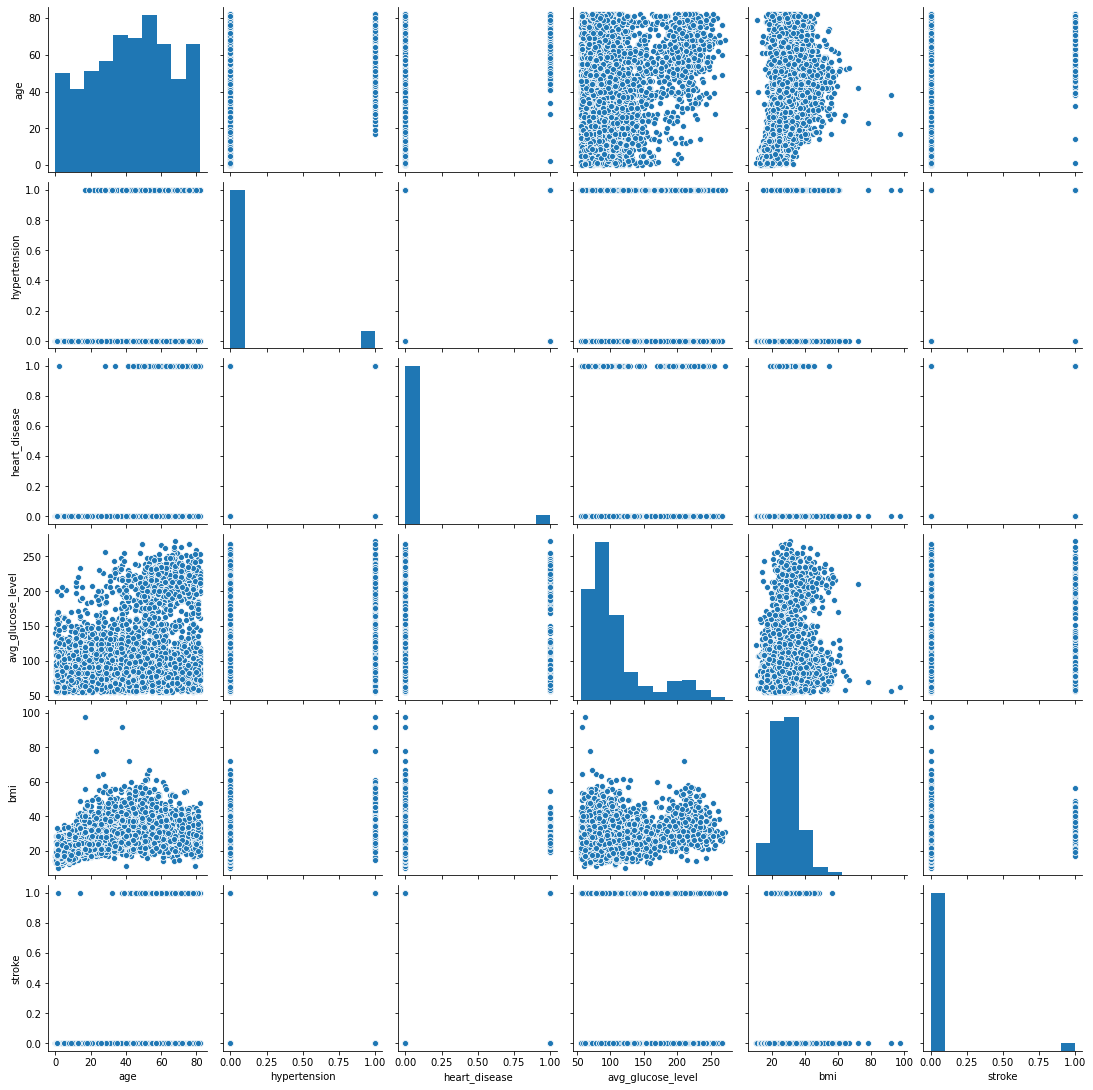

In [17]:
sns.pairplot(df)

In [18]:
px.scatter(x=df['age'],y=df['stroke'])

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [20]:
def encode(df):
    categorical=list(df.select_dtypes(include=['category','object']))
    for feature in categorical:
        try:
            df[feature] = le.fit_transform(df[feature])
        except:
            print('Error encoding '+feature)
    return df

In [21]:
df_train=encode(df)

In [22]:
df_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,1,67.0,0,1,1,2,1,228.69,36.600,1,1
51676,0,61.0,0,0,1,3,0,202.21,29.065,2,1
31112,1,80.0,0,1,1,2,0,105.92,32.500,2,1
60182,0,49.0,0,0,1,2,1,171.23,34.400,3,1
1665,0,79.0,1,0,1,3,0,174.12,24.000,2,1


In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
smote=SMOTE(sampling_strategy='minority')


In [25]:
X_new=df_train.drop(['stroke'],1)
y_new=df_train['stroke']

In [26]:
X_sm,y_sm=smote.fit_sample(X_new,y_new)

In [43]:
y_sm.value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=33, stratify=y_sm)

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [30]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [31]:
pip install Pipeline

Note: you may need to restart the kernel to use updated packages.


In [32]:
log_reg.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [33]:
y_pred_logReg=log_reg.predict(X_test)

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test,y_pred_logReg))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       973
           1       0.80      0.80      0.80       972

    accuracy                           0.80      1945
   macro avg       0.80      0.80      0.80      1945
weighted avg       0.80      0.80      0.80      1945



In [36]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf=RandomForestClassifier()

In [37]:
rnd_clf.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
y_pred_rnd_clf=rnd_clf.predict(X_test)


In [39]:
print(classification_report(y_test,y_pred_rnd_clf))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       973
           1       0.94      0.97      0.95       972

    accuracy                           0.95      1945
   macro avg       0.95      0.95      0.95      1945
weighted avg       0.95      0.95      0.95      1945



In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve

In [41]:
dtree=DecisionTreeClassifier()
ada=AdaBoostClassifier()
gradB=GradientBoostingClassifier

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=33)
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=33)

In [48]:
model_10 = GradientBoostingClassifier(n_estimators=10, max_depth=6, random_state=33).fit(X_train1, y_train1)
model_50 = GradientBoostingClassifier(n_estimators=50, max_depth=6, random_state=33).fit(X_train1, y_train1)
model_100 = GradientBoostingClassifier(n_estimators=100, max_depth=6, random_state=33).fit(X_train1, y_train1)


print("Accuracy on validation data for model_10: ",model_10.score(X_val,y_val))
print("Accuracy on validation data for model_50: ",model_50.score(X_val,y_val))
print("Accuracy on validation data for model_100: ",model_100.score(X_val,y_val))

print(" ")

print("Accuracy on test data for model_10: ", model_10.score(X_test,y_test))
print("Accuracy on test data for model_50: ", model_50.score(X_test,y_test))
print("Accuracy on test data for model_100: ", model_100.score(X_test,y_test))

Accuracy on validation data for model_10:  0.864070536370316
Accuracy on validation data for model_50:  0.914033798677443
Accuracy on validation data for model_100:  0.9316678912564291
 
Accuracy on test data for model_10:  0.8659581762084333
Accuracy on test data for model_50:  0.9112101474117243
Accuracy on test data for model_100:  0.9300651354130957


Lets use Model 100

Text(0.5, 0, 'Feature Importance Score')

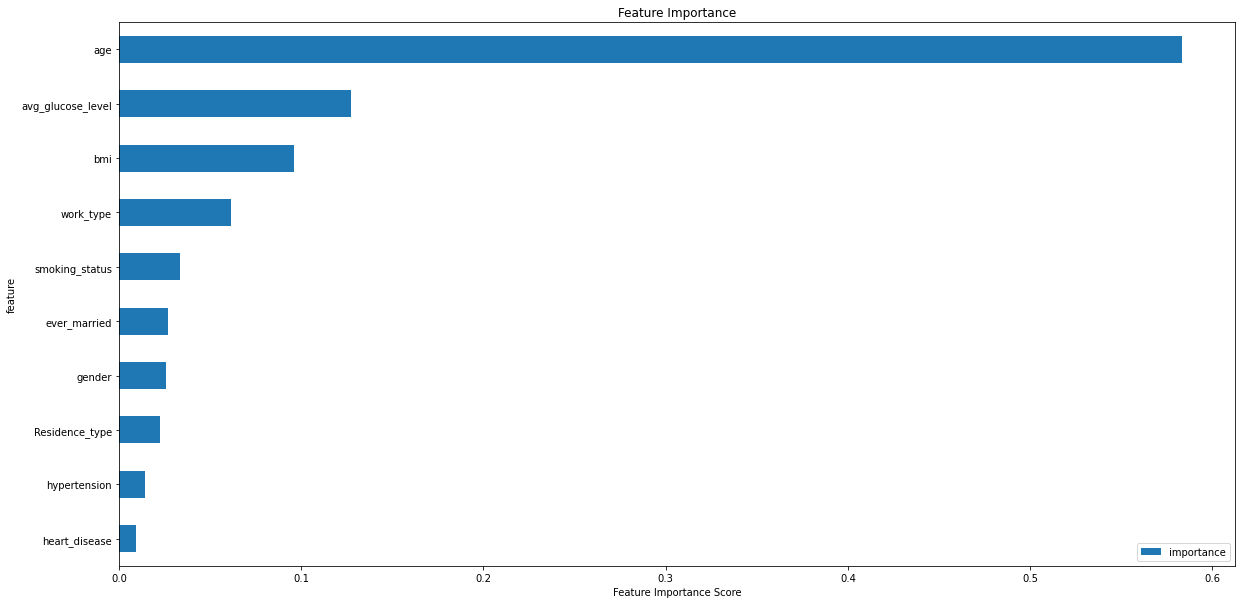

In [49]:
feat_imp = pd.DataFrame({'importance':model_100.feature_importances_})    
feat_imp['feature'] = X_train1.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
feat_imp = feat_imp.iloc[:10]

feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=False)
feat_imp.plot.barh(title="Feature Importance", figsize=(20,10))
plt.xlabel('Feature Importance Score')

In [53]:
model_100.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=6, random_state=33)

In [54]:
y_pred_GradB=model_100.predict(X_test)

In [56]:
print(classification_report(y_test,y_pred_GradB))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1479
           1       0.90      0.96      0.93      1438

    accuracy                           0.93      2917
   macro avg       0.93      0.93      0.93      2917
weighted avg       0.93      0.93      0.93      2917



In [60]:
dtree=DecisionTreeClassifier()
ada=AdaBoostClassifier()
gradB=GradientBoostingClassifier()
rfc=RandomForestClassifier()

In [61]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

classifiers = [log_reg, dtree, rfc, model_100]


for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

    
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)
result_table

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,fpr,tpr,auc
classifiers,,,
LogisticRegression,"[0.0, 0.0, 0.0, 0.000676132521974307, 0.000676...","[0.0, 0.0006954102920723226, 0.027121001390820...",0.879644
DecisionTreeClassifier,"[0.0, 0.12914131169709264, 1.0]","[0.0, 0.9200278164116829, 1.0]",0.895443
RandomForestClassifier,"[0.0, 0.0, 0.000676132521974307, 0.00067613252...","[0.0, 0.20097357440890126, 0.3372739916550765,...",0.985420
GradientBoostingClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0006954102920723226, 0.002086230876216...",0.981493


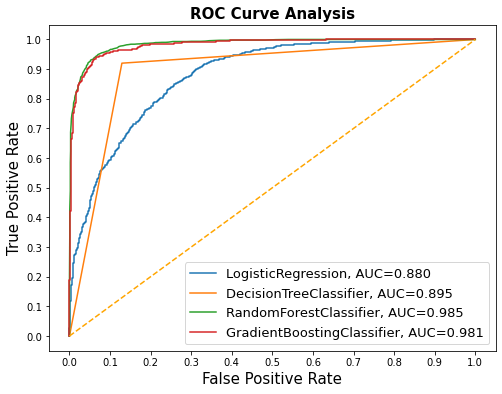

In [62]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']));
    
plt.plot([0,1], [0,1], color='orange', linestyle='--');

plt.xticks(np.arange(0.0, 1.1, step=0.1));
plt.xlabel("False Positive Rate", fontsize=15);

plt.yticks(np.arange(0.0, 1.1, step=0.1));
plt.ylabel("True Positive Rate", fontsize=15);

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15);
plt.legend(prop={'size':13}, loc='lower right');

In [64]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [65]:
model=model_100
cross_val = KFold(n_splits=5, random_state=33, shuffle=True)
scores = cross_val_score(model_100, X_train, y_train, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - Gradient Boosting: ", scores.mean())

Mean AUC Score - Gradient Boosting:  0.9833927084608989


In [67]:
df_new=pd.read_csv("healthcare-dataset-stroke-data.csv")
df_new.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')